In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [37]:
df=pd.read_csv("KDDF2.csv")
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [38]:
df.shape

(125973, 42)

In [39]:
df['labels'].value_counts()

normal     67343
anomaly    58630
Name: labels, dtype: int64

In [40]:
X=df.iloc[:,:-1]
Y=df["labels"]

In [41]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,8,udp,private,SF,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [42]:
Y

0          normal
1          normal
2         anomaly
3          normal
4          normal
           ...   
125968    anomaly
125969     normal
125970     normal
125971    anomaly
125972     normal
Name: labels, Length: 125973, dtype: object

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le=LabelEncoder()
Y=le.fit_transform(Y)
Y

array([1, 1, 0, ..., 1, 0, 1])

In [45]:
from sklearn.compose import ColumnTransformer

In [46]:
transformer=ColumnTransformer(transformers=[('tkl',OneHotEncoder(sparse=False,drop='first'),[1,2,3])] ,remainder='passthrough')
X=transformer.fit_transform(X)
X

array([[1.  , 0.  , 0.  , ..., 0.  , 0.05, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ],
       ...,
       [1.  , 0.  , 0.  , ..., 0.  , 0.01, 0.  ],
       [1.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [47]:
df['protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [48]:
df['service'].value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

In [49]:
df['flag'].value_counts()

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler=StandardScaler()
minmax=MinMaxScaler()

In [52]:
scaler.fit(X)
minmax.fit(X)

MinMaxScaler()

In [53]:
x_scaled=scaler.transform(X)
x_minmax=minmax.transform(X)

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,Y,test_size=0.20,random_state=111)

In [55]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
log_model=logistic.fit(x_train,y_train)

C:\Users\SANJIDA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
log_pre=log_model.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_test,log_pre)
cm

array([[11212,   459],
       [  271, 13253]], dtype=int64)

In [58]:
report=classification_report(y_test,log_pre)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     11671
           1       0.97      0.98      0.97     13524

    accuracy                           0.97     25195
   macro avg       0.97      0.97      0.97     25195
weighted avg       0.97      0.97      0.97     25195



In [59]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model=dt.fit(x_train,y_train)

In [60]:
dt_pred=dt_model.predict(x_test)
dt_pred

array([1, 0, 1, ..., 0, 1, 0])

In [61]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_test,dt_pred)
cm

array([[11651,    20],
       [   26, 13498]], dtype=int64)

In [62]:
report=classification_report(y_test,dt_pred)
print(report)
print(accuracy_score(y_test,dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11671
           1       1.00      1.00      1.00     13524

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

0.9981742409208176


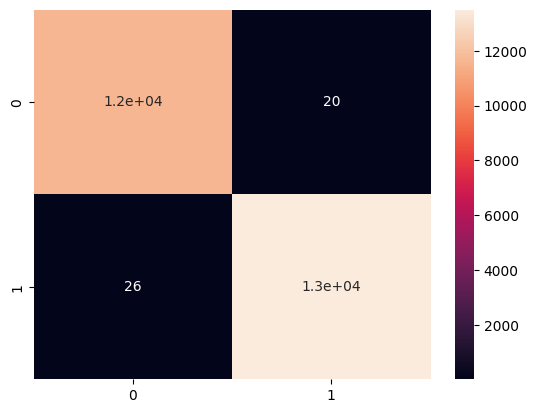

In [63]:
sea.heatmap(cm,annot=True)
plt.show()